# LIBRARIES

In [ ]:
pip install xgboost

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

# IMPORTING, SUMMARIZING, VISUALIZING DATA

LOAD DATA

In [25]:
traindf = pd.read_csv("train.csv")
traindf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [26]:
testdf = pd.read_csv("test.csv")
testdf.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [27]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
testdf.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


SUMMARIZING DATA

In [31]:
traindf.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

VISUALIZING DATA

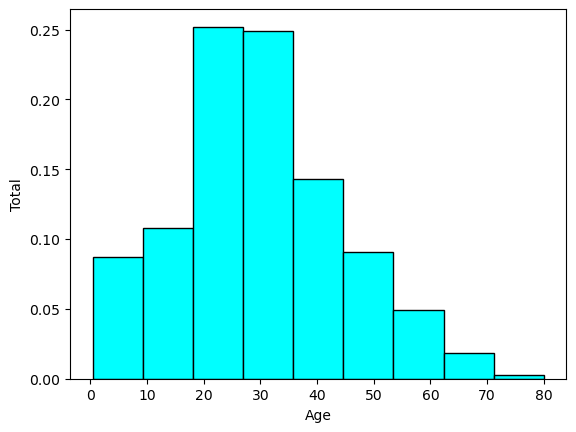

In [32]:
w = np.ones_like(traindf['Age']) / traindf['Age'].count()
plt.hist(traindf['Age'], bins = 9, weights=w, facecolor='cyan', edgecolor='black', linewidth=1)
plt.xlabel('Age')
plt.ylabel('Total')
plt.show()

PROCESS DATA WITH ML

In [33]:
women = traindf.loc[traindf.Sex == 'female']['Survived']
rate_wm = sum(women) / len(women)

print(rate_wm)

0.7420382165605095


In [34]:
men = traindf.loc[traindf.Sex == 'male']['Survived']
rate_m = sum(men) / len(men)

print(rate_m)

0.18890814558058924


In [35]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
y = traindf["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(traindf[features])
X_test = pd.get_dummies(testdf[features])

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=42)

In [38]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_val = xgb.DMatrix(X_val, y_val, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test)


In [39]:
n = 100
params = {
    'objective': 'binary:logistic',
    'max_depth': 4,
    'learning_rate': 0.1,
    'eval_metric': 'logloss'
}
model = xgb.train(params=params, dtrain=xgb_train, num_boost_round=n)

In [40]:
pred = model.predict(xgb_test)

In [41]:
pred = np.round(pred).astype(int)

In [42]:
print(len(pred))

418


In [43]:
output = pd.DataFrame({'PassengerId': testdf.PassengerId, 'Survived': pred})
output.to_csv('sub.csv', index=False)
print("Successfully")

Successfully


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
model = RandomForestRegressor(n_estimators=500, oob_score=True, max_features=8, random_state=100)

In [47]:
model.fit(X_train, y_train)

RandomForestRegressor(max_features=8, n_estimators=500, oob_score=True,
                      random_state=100)

In [48]:
re = model.predict(X_test)

In [50]:
re = np.round(re).astype(int)

In [51]:
output_rfr = pd.DataFrame({'PassengerId': testdf.PassengerId, 'Survived': re})
output_rfr.to_csv('sub.csv', index=False)
print("Successfully")

Successfully
